In [1]:
import pandas as pd

In [2]:
#Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame
df = pd.read_csv('fatal-police-shootings-data.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [3]:
# Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’)
# oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’)

df_mod = df.pivot_table(index=['race','signs_of_mental_illness'],values = 'id',aggfunc=len)

df_mod['percent'] = df_mod.groupby(level=0).transform(lambda x: (x/x.sum()).round(2))

df_mod.rename(columns={'id':'count'},inplace=True)
df_mod.sort_values(by = 'percent',ascending=False)

count  percent
race signs_of_mental_illness                
B    False                     1114     0.86
H    False                      745     0.83
N    False                       64     0.82
O    False                       37     0.77
A    False                       69     0.74
W    False                     1763     0.71
     True                       713     0.29
A    True                        24     0.26
O    True                        11     0.23
N    True                        14     0.18
H    True                       157     0.17
B    True                       184     0.14

Rasa biała charakteryzuje się najwyższym odsetkiem znamion choroby psychicznej podczas interwencji.

In [4]:
# Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji.

df['date'] = pd.to_datetime(df['date'])
df['date'].dt.day_name().head()

0      Friday
1      Friday
2    Saturday
3      Sunday
4      Sunday
Name: date, dtype: object

In [5]:
df['weekday']=df['date'].dt.day_name()
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weekday
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


In [6]:
# Zlicz interwencje według odpowiedniego dnia tygodnia.

df_weekday = df.groupby('weekday')['id'].count().to_frame()

In [7]:
# Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday = df_weekday.reindex(cats).reset_index().rename(columns={'id':'count'})

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

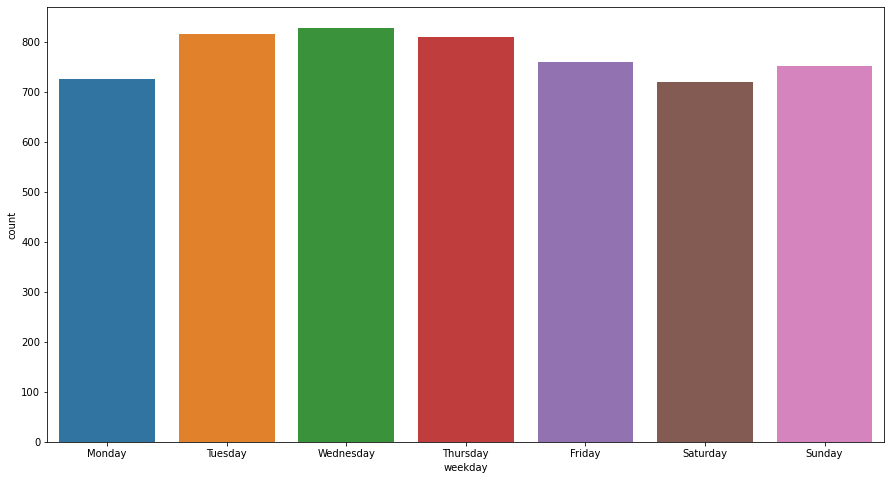

In [9]:
plt.figure(figsize=(15,8))
fig = sns.barplot(data=df_weekday, x='weekday',y='count')
plt.show()

In [10]:
# Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów.
# Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło
# w przeliczeniu na 1000 mieszkańców każdego ze stanów.

# wczytanie skrótów
abv_states_all = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)
col_name_state = abv_states_all[0].columns[0]
col_name_abv = abv_states_all[0].columns[5]
abv_states_all[0].rename(columns={col_name_state: 'State', col_name_abv: 'Abbreviation'},inplace=True)
abv_states = abv_states_all[0][['State', 'Abbreviation']].sort_values(by='State')

# słownik skrótów
states_dict = dict(zip(abv_states['State'], abv_states['Abbreviation']))

# wczytanie populacji
population = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population')
population_state = population[0][['State','Population estimate, July 1, 2019[2]']].rename(columns={"Population estimate, July 1, 2019[2]":'population'})

# suma incydentów w każdym ze stanów
incidents = df.groupby('state')['id'].count().to_frame().reset_index()
incidents_dict = dict(zip(incidents['state'], incidents['id']))

# łączenie tabel
population_state['state'] = population_state['State'].map(states_dict)
population_state['incidents'] = population_state['state'].map(incidents_dict)

# incydenty na 1000 mieszkanców
population_state['indices_per_1000'] = (population_state['incidents']/population_state['population'])*1000
population_state


,State,population,state,incidents,indices_per_1000
0,California,39512223,CA,799.0,0.020222
1,Texas,28995881,TX,481.0,0.016589
2,New York,21477737,NY,101.0,0.004703
3,Florida,19453561,FL,350.0,0.017992
4,Illinois,12801989,IL,104.0,0.008124
5,Pennsylvania,12671821,PA,108.0,0.008523
6,Ohio,11689100,OH,155.0,0.013260
7,Georgia,10617423,GA,182.0,0.017142
8,North Carolina,10488084,NC,156.0,0.014874
9,Michigan,9986857,MI,78.0,0.007810
